<a href="https://colab.research.google.com/github/joaocarvoli/MachineLearning-course/blob/main/Works/01_work_bike_rental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction:** `Bike rental count hourly`
### *In many cities around the world, there are bike-sharing systems. It's an interesting system because anyone can rent a bike and use it. Today, there is great interest in these systems due to their important role in traffic, environment, and health issues.*
#### **Our problem is to predict the number of bicycles rented per hour based on environmental and seasonal settings.**

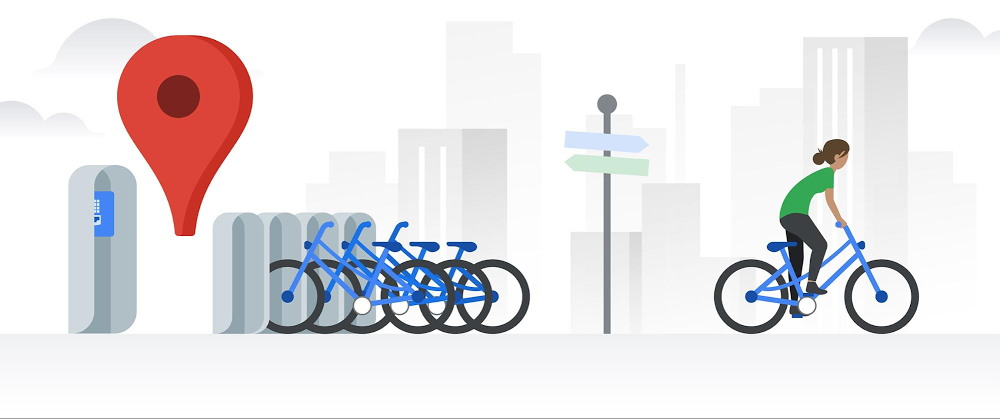

## Dataset characteristics
=========================================	
	
	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

# **1. Imports:** 

### 1.1 - Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

### 1.2 - Dataset

In [2]:
filename_per_hour = '/content/drive/MyDrive/data-sets/bike-rental/hour.csv'
df = pd.read_csv(filename_per_hour)
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


# **2. Data Analisys:**

### 2.1 - What's our data size?

In [3]:
df.shape

(17379, 17)

### 2.2 - Our dataset contains NaN values?

In [4]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### 2.3 - What's the dtype of our features?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### 2.4 - The dteday is a object column, it is a time series.
- #### [`How to work with time series`](https://www.machinelearningplus.com/time-series/time-series-analysis-python/)

In [6]:
df.dteday

0        2011-01-01
1        2011-01-01
2        2011-01-01
3        2011-01-01
4        2011-01-01
            ...    
17374    2012-12-31
17375    2012-12-31
17376    2012-12-31
17377    2012-12-31
17378    2012-12-31
Name: dteday, Length: 17379, dtype: object

In [7]:
df.dteday = pd.to_datetime(df['dteday'])

In [8]:
df['year_extracted'] = df['dteday'].dt.year
df['month_extracted'] = df['dteday'].dt.month

In [9]:
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year_extracted,month_extracted
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,2011,1
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,2011,1
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,2011,1
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,2011,1
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,2011,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,2012,12
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,2012,12
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,2012,12
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,2012,12


In [10]:
df.loc[:,['yr','mnth', 'hr','dteday']]

,yr,mnth,hr,dteday
0,0,1,0,2011-01-01
1,0,1,1,2011-01-01
2,0,1,2,2011-01-01
3,0,1,3,2011-01-01
4,0,1,4,2011-01-01
...,...,...,...,...
17374,1,12,19,2012-12-31
17375,1,12,20,2012-12-31
17376,1,12,21,2012-12-31
17377,1,12,22,2012-12-31


In [11]:
df.loc[:,['year_extracted','month_extracted','dteday']]

,year_extracted,month_extracted,dteday
0,2011,1,2011-01-01
1,2011,1,2011-01-01
2,2011,1,2011-01-01
3,2011,1,2011-01-01
4,2011,1,2011-01-01
...,...,...,...
17374,2012,12,2012-12-31
17375,2012,12,2012-12-31
17376,2012,12,2012-12-31
17377,2012,12,2012-12-31


In [12]:
year_compared = np.unique(np.array((df['yr'] == 0) == (df['year_extracted'] == 2011)))
month_compared = np.unique(np.array((df['mnth'] == 0) == (df['month_extracted'] == 2011)))
print(f'Checking if 100% yr column are equal year_extracted and the result is {year_compared}')
print(f'Checking if 100% month column are equal month_extracted and the result is {month_compared}')

Checking if 100% yr column are equal year_extracted and the result is [ True]
Checking if 100% month column are equal month_extracted and the result is [ True]


**_After analyzing, I could see that this feature is already represented by the columns ['yr', 'mnth', 'hr']_.** 

**Our unique doubt is that the hour column wasn't given  the datetime column but is what we can do.**

In [13]:
df.drop(['dteday','year_extracted','month_extracted'], axis = 1, inplace = True)

### 2.5 - How our target is distribuited?

In [14]:
df.cnt.value_counts().sort_values()

887      1
793      1
777      1
697      1
748      1
      ... 
2      208
3      224
4      231
6      236
5      260
Name: cnt, Length: 869, dtype: int64

In [15]:
np.min(df.cnt), np.max(df.cnt) 

(1, 977)

# **3. Preprocessing:**

### There are rows where they appear once and that's bad because when train_test_split is done, it can't split by label, as you can see in the **2.5 - topic**.

In [16]:
rows_before = df.shape[0]
print(f'The number of lines before remove cnt == 1 is {rows_before}')

The number of lines before remove cnt == 1 is 17379


In [17]:
df['cnt'].isin(df['cnt'].value_counts()[df['cnt'].value_counts()==1].index)

0        False
1        False
2        False
3        False
4        False
         ...  
17374    False
17375    False
17376    False
17377    False
17378    False
Name: cnt, Length: 17379, dtype: bool

In [18]:
df[df['cnt'].isin(df['cnt'].value_counts()[df['cnt'].value_counts()==1].index)]

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
3355,3356,2,0,5,17,0,2,1,1,0.70,0.6515,0.61,0.1045,56,492,548
10407,10408,1,1,3,18,0,3,1,1,0.70,0.6364,0.32,0.0000,102,647,749
10431,10432,1,1,3,18,0,4,1,1,0.66,0.6212,0.44,0.2836,98,648,746
10477,10478,1,1,3,16,0,6,0,1,0.64,0.6212,0.50,0.0000,367,318,685
10622,10623,2,1,3,17,0,5,1,2,0.72,0.6515,0.42,0.1642,264,693,957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15756,15757,4,1,10,17,0,2,1,1,0.68,0.6364,0.41,0.0000,67,871,938
15757,15758,4,1,10,18,0,2,1,1,0.62,0.6212,0.53,0.0896,64,762,826
15780,15781,4,1,10,17,0,3,1,1,0.66,0.6212,0.47,0.0000,87,876,963
16702,16703,4,1,12,17,0,1,1,1,0.52,0.5000,0.63,0.1045,43,665,708


In [19]:
index_of_insignificant_values = df[df['cnt'].isin(df['cnt'].value_counts()[df['cnt'].value_counts()==1].index)].index
index_of_insignificant_values

Int64Index([ 3355, 10407, 10431, 10477, 10622, 11145, 11221, 11268, 11413,
            11700, 11724, 11763, 11893, 11907, 11916, 12109, 12253, 12396,
            12468, 12541, 12612, 12876, 12901, 12925, 12949, 13044, 13212,
            13285, 13286, 13380, 13395, 13452, 13453, 13548, 13596, 13707,
            13766, 13779, 13788, 13789, 13933, 14077, 14100, 14101, 14124,
            14125, 14220, 14221, 14244, 14259, 14293, 14317, 14388, 14412,
            14436, 14451, 14595, 14604, 14653, 14698, 14699, 14724, 14725,
            14748, 14772, 14773, 14787, 14820, 14892, 14893, 14931, 14941,
            14964, 15060, 15084, 15108, 15132, 15133, 15178, 15276, 15300,
            15301, 15420, 15444, 15512, 15588, 15612, 15636, 15680, 15703,
            15723, 15732, 15733, 15756, 15757, 15780, 16702, 16957],
           dtype='int64')

In [20]:
df.drop(index_of_insignificant_values, inplace=True)

In [21]:
df.cnt.value_counts().sort_values()

791      2
745      2
844      2
477      2
637      2
      ... 
2      208
3      224
4      231
6      236
5      260
Name: cnt, Length: 771, dtype: int64

In [22]:
print(f'Now, the number of rows is {df.shape[0]}')

Now, the number of rows is 17281


### Dropping the instant column because we already have the index column

In [23]:
df.drop('instant', axis = 1,inplace=True)

### 3.1 - Separating the X and y, respectively our features and label.

In [24]:
X = df.loc[:,:'registered']
y = df.loc[:,'cnt']

In [25]:
X

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48


In [26]:
y

0         16
1         40
2         32
3         13
4          1
        ... 
17374    119
17375     89
17376     90
17377     61
17378     49
Name: cnt, Length: 17281, dtype: int64

### 3.2 - Seeing the categorical features:

In [27]:
map_replace = {
    'season': {1: 'springer', 2: 'summer', 3: 'fall', 4: 'winter'},
    'yr': {0: '2011', 1:'2012'},
    'mnth': {1: 'jan', 2: 'feb', 3: 'mar', 4:'apr', 5:'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12:'dec'},
    'weekday': {0:'sun', 1:'mon', 2:'tue', 3:'wed', 4:'thu', 5:'fri', 6:'sat'},
    'workingday': {1: 'work', 0:'notwork'}
}

In [28]:
X.replace(map_replace, inplace=True)

In [29]:
X

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,springer,2011,jan,0,0,sat,notwork,1,0.24,0.2879,0.81,0.0000,3,13
1,springer,2011,jan,1,0,sat,notwork,1,0.22,0.2727,0.80,0.0000,8,32
2,springer,2011,jan,2,0,sat,notwork,1,0.22,0.2727,0.80,0.0000,5,27
3,springer,2011,jan,3,0,sat,notwork,1,0.24,0.2879,0.75,0.0000,3,10
4,springer,2011,jan,4,0,sat,notwork,1,0.24,0.2879,0.75,0.0000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,springer,2012,dec,19,0,mon,work,2,0.26,0.2576,0.60,0.1642,11,108
17375,springer,2012,dec,20,0,mon,work,2,0.26,0.2576,0.60,0.1642,8,81
17376,springer,2012,dec,21,0,mon,work,1,0.26,0.2576,0.60,0.1642,7,83
17377,springer,2012,dec,22,0,mon,work,1,0.26,0.2727,0.56,0.1343,13,48


### 3.3 - Creating new columns based on the new categories and concat them to the X dataset

In [30]:
X = pd.concat([X, pd.get_dummies(X['season'], prefix = 'season_')], axis=1)
X = pd.concat([X, pd.get_dummies(X['yr'], prefix = 'yr_')], axis=1)
X = pd.concat([X, pd.get_dummies(X['mnth'], prefix = 'month_')], axis=1)
X = pd.concat([X, pd.get_dummies(X['weekday'], prefix = 'day_')], axis=1)
X = pd.concat([X, pd.get_dummies(X['workingday'])], axis=1)

In [31]:
X.drop(['season', 'yr', 'mnth', 'weekday', 'workingday'], axis = 1, inplace=True)

In [32]:
X

,hr,holiday,weathersit,temp,atemp,hum,windspeed,casual,registered,season__fall,season__springer,season__summer,season__winter,yr__2011,yr__2012,month__apr,month__aug,month__dec,month__feb,month__jan,month__jul,month__jun,month__mar,month__may,month__nov,month__oct,month__sep,day__fri,day__mon,day__sat,day__sun,day__thu,day__tue,day__wed,notwork,work
0,0,0,1,0.24,0.2879,0.81,0.0000,3,13,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1,0,1,0.22,0.2727,0.80,0.0000,8,32,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,2,0,1,0.22,0.2727,0.80,0.0000,5,27,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,3,0,1,0.24,0.2879,0.75,0.0000,3,10,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,4,0,1,0.24,0.2879,0.75,0.0000,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,19,0,2,0.26,0.2576,0.60,0.1642,11,108,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
17375,20,0,2,0.26,0.2576,0.60,0.1642,8,81,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
17376,21,0,1,0.26,0.2576,0.60,0.1642,7,83,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
17377,22,0,1,0.26,0.2727,0.56,0.1343,13,48,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


### 3.4 - Reducing our data size

In [33]:
def reduce_mem_usage_automatic(df):
    """Reduces the memory usage of the given dataframe.
    Parameter
    ---------
    df : dataframe
        The input data to which the operation of memory reduction will be performed.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print("Memory usage of dataframe is {:.2f} MB".format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype
        if "int" in str(col_type):
            c_min = df[col].min()
            c_max = df[col].max()
            if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                df[col] = df[col].astype(np.int8)
            elif c_min > np.iinfo(np.uint8).min and c_max < np.iinfo(np.uint8).max:
                df[col] = df[col].astype(np.uint8)
            elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                df[col] = df[col].astype(np.int16)
            elif c_min > np.iinfo(np.uint16).min and c_max < np.iinfo(np.uint16).max:
                df[col] = df[col].astype(np.uint16)
            elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                df[col] = df[col].astype(np.int32)
            elif c_min > np.iinfo(np.uint32).min and c_max < np.iinfo(np.uint32).max:
                df[col] = df[col].astype(np.uint32)
            elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                df[col] = df[col].astype(np.int64)
            elif c_min > np.iinfo(np.uint64).min and c_max < np.iinfo(np.uint64).max:
                df[col] = df[col].astype(np.uint64)
        elif col_type == np.float:
            c_min = df[col].min()
            c_max = df[col].max()
            if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                df[col] = df[col].astype(np.float16)
            elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                df[col] = df[col].astype(np.float32)
            else:
                df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print("Memory usage after optimization is: {:.2f} MB".format(end_mem))
    print("Decreased by {:.1f}%".format(100 * (start_mem - end_mem) / start_mem))

In [34]:
X.dtypes

hr                    int64
holiday               int64
weathersit            int64
temp                float64
atemp               float64
hum                 float64
windspeed           float64
casual                int64
registered            int64
season__fall          uint8
season__springer      uint8
season__summer        uint8
season__winter        uint8
yr__2011              uint8
yr__2012              uint8
month__apr            uint8
month__aug            uint8
month__dec            uint8
month__feb            uint8
month__jan            uint8
month__jul            uint8
month__jun            uint8
month__mar            uint8
month__may            uint8
month__nov            uint8
month__oct            uint8
month__sep            uint8
day__fri              uint8
day__mon              uint8
day__sat              uint8
day__sun              uint8
day__thu              uint8
day__tue              uint8
day__wed              uint8
notwork               uint8
work                

In [35]:
reduce_mem_usage_automatic(X)

Memory usage of dataframe is 1.76 MB
Memory usage after optimization is: 0.82 MB
Decreased by 53.3%


In [36]:
X.dtypes

hr                     int8
holiday                int8
weathersit             int8
temp                float16
atemp               float16
hum                 float16
windspeed           float16
casual                int16
registered            int16
season__fall           int8
season__springer       int8
season__summer         int8
season__winter         int8
yr__2011               int8
yr__2012               int8
month__apr             int8
month__aug             int8
month__dec             int8
month__feb             int8
month__jan             int8
month__jul             int8
month__jun             int8
month__mar             int8
month__may             int8
month__nov             int8
month__oct             int8
month__sep             int8
day__fri               int8
day__mon               int8
day__sat               int8
day__sun               int8
day__thu               int8
day__tue               int8
day__wed               int8
notwork                int8
work                

### 3.5 - Splitting and Stratifying data:

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32, stratify = y)

### 3.6 - Seeing our X_train and y_train:

In [38]:
X_train

,hr,holiday,weathersit,temp,atemp,hum,windspeed,casual,registered,season__fall,season__springer,season__summer,season__winter,yr__2011,yr__2012,month__apr,month__aug,month__dec,month__feb,month__jan,month__jul,month__jun,month__mar,month__may,month__nov,month__oct,month__sep,day__fri,day__mon,day__sat,day__sun,day__thu,day__tue,day__wed,notwork,work
113,22,0,1,0.180054,0.197021,0.549805,0.134277,1,41,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
14152,21,0,2,0.680176,0.242432,0.689941,0.298584,57,198,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2676,10,0,1,0.660156,0.621094,0.689941,0.358154,22,98,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2959,5,0,2,0.439941,0.439453,0.770020,0.000000,0,5,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
16085,22,0,3,0.300049,0.287842,0.560059,0.253662,4,56,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161,4,1,1,0.320068,0.318115,0.449951,0.164185,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
14917,18,0,2,0.600098,0.545410,0.879883,0.164185,19,262,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
3618,16,0,2,0.720215,0.651367,0.300049,0.134277,168,272,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
5910,19,0,3,0.620117,0.515137,1.000000,0.328369,1,51,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1


In [39]:
y_train

113       42
14152    255
2676     120
2959       5
16085     60
        ... 
1161       1
14917    281
3618     440
5910      52
218       94
Name: cnt, Length: 12096, dtype: int64

### **3.7 - Seeing statistics about our data:**

In [40]:
X_train.describe()

,hr,holiday,weathersit,temp,atemp,hum,windspeed,casual,registered,season__fall,season__springer,season__summer,season__winter,yr__2011,yr__2012,month__apr,month__aug,month__dec,month__feb,month__jan,month__jul,month__jun,month__mar,month__may,month__nov,month__oct,month__sep,day__fri,day__mon,day__sat,day__sun,day__thu,day__tue,day__wed,notwork,work
count,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000
mean,11.512566,0.028853,1.423776,0.495117,0.474121,0.627930,0.190918,35.351356,149.963790,0.256614,0.246032,0.255126,0.242229,0.501157,0.498843,0.084325,0.084573,0.081928,0.077381,0.083747,0.086310,0.082011,0.085896,0.085317,0.086227,0.081845,0.080440,0.144924,0.143271,0.144841,0.143932,0.142278,0.139881,0.140873,0.317626,0.682374
std,6.920729,0.167399,0.639070,0.192627,0.172119,0.192749,0.122681,48.821348,144.027775,0.436782,0.430715,0.435950,0.428450,0.500019,0.500019,0.277887,0.278257,0.274266,0.267206,0.277019,0.280832,0.274392,0.280222,0.279365,0.280710,0.274140,0.271984,0.352039,0.350363,0.351955,0.351035,0.349350,0.346878,0.347905,0.465572,0.465572
min,0.000000,0.000000,1.000000,0.020004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,1.000000,0.340088,0.333252,0.479980,0.104492,4.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.000000,0.000000,1.000000,0.500000,0.484863,0.629883,0.193970,16.000000,114.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,18.000000,0.000000,2.000000,0.660156,0.621094,0.779785,0.253662,48.000000,218.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,23.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850586,361.000000,815.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### _Insights_:
#### As our data is very different and you can percept if you look to min and max, let's scale!

### 3.8 - Scaling our data:

### **_Min Max Scaler_**

In [41]:
scaler_min_max = MinMaxScaler()
X_train_minmax = scaler_min_max.fit_transform(X_train)
X_test_minmax = scaler_min_max.transform(X_test)

In [42]:
X_train_minmax

array([[0.95652175, 0.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.9130435 , 0.        , 0.33333334, ..., 0.        , 0.        ,
        1.        ],
       [0.43478262, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.6956522 , 0.        , 0.33333334, ..., 0.        , 1.        ,
        0.        ],
       [0.826087  , 0.        , 0.6666666 , ..., 0.        , 0.        ,
        1.        ],
       [0.39130434, 0.        , 0.33333334, ..., 0.        , 0.        ,
        1.        ]], dtype=float32)

### **_Standart Scaler_**

In [43]:
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

In [44]:
X_train_std

array([[ 1.5154281 , -0.17236505, -0.6631419 , ...,  2.4695327 ,
        -0.68225455,  0.68225455],
       [ 1.3709286 , -0.17236505,  0.90169704, ..., -0.4049349 ,
        -0.68225455,  0.68225455],
       [-0.21856491, -0.17236505, -0.6631419 , ..., -0.4049349 ,
        -0.68225455,  0.68225455],
       ...,
       [ 0.6484316 , -0.17236505,  0.90169704, ..., -0.4049349 ,
         1.4657285 , -1.4657285 ],
       [ 1.0819298 , -0.17236505,  2.466536  , ..., -0.4049349 ,
        -0.68225455,  0.68225455],
       [-0.36306435, -0.17236505,  0.90169704, ..., -0.4049349 ,
        -0.68225455,  0.68225455]], dtype=float32)

# **4. Algorithm:**

### **We would use these algorithms:**
- *KNN Regressor: based in the problems already resolved.*
- *Linear Regression: based in classes*
- *Random Forest: based in [Theory - Normalized Nerd](https://www.youtube.com/watch?v=UhY5vPfQIrA) and [From Scratch - Normalized Nerd](https://www.youtube.com/watch?v=P2ZB8c5Ha1Q)*

### Seeing how is label behavior:

In [45]:
print(f'The standard deviation of our model is {np.std(y_train)} and the RMSE metric needs smaller than it.')

The standard deviation of our model is 173.96394859897813 and the RMSE metric needs smaller than it.


In [46]:
print(f'The have {y_train.nunique()} unique values.')

The have 771 unique values.


In [47]:
y_train.unique().min(), y_train.unique().max()

(1, 900)

In [48]:
y_train.sort_values().unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

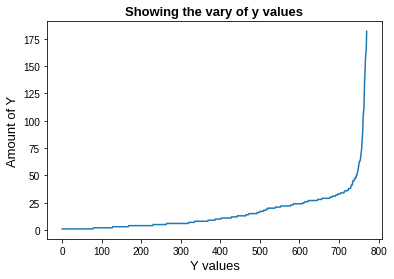

In [49]:
y_vary = y_train.value_counts().sort_values().tolist()
plt.plot(y_vary)
plt.title('Showing the vary of y values', fontsize=13,fontweight='bold')
plt.xlabel('Y values', fontsize=13)
plt.ylabel('Amount of Y', fontsize=13)
plt.style.use("seaborn")
plt.show()

### *We can percept that our standart deviation is big and for the problem it isn't good becuase there is values that difference between is 1.*
### *Let's use another baseline to evaluate.*

### Decision tree regressor

In [61]:
regr_tree = DecisionTreeRegressor(random_state=0)
regr_tree.fit(X_train, y_train)
regr_tree_pred = regr_tree.predict(X_test)
print(f'RMSE of Not scaled {mean_squared_error(y_test, regr_tree_pred, squared=False)}')

RMSE of Not scaled 4.8868785011552145


In [62]:
regr_tree_min_max = DecisionTreeRegressor(random_state=0)
regr_tree_min_max.fit(X_train_minmax, y_train)
regr_tree_pred1 = regr_tree.predict(X_test_minmax)
print(f'RMSE of Min max scaler {mean_squared_error(y_test, regr_tree_pred1, squared=False)}')

RMSE of Min max scaler 258.58838590877303


In [64]:
regr_tree_min_max = DecisionTreeRegressor(random_state=0)
regr_tree_min_max.fit(X_train_std, y_train)
regr_tree_pred2 = regr_tree.predict(X_test_std)
print(f'RMSE of Std scaler {mean_squared_error(y_test, regr_tree_pred2, squared=False)}')

RMSE of Std scaler 257.7103694511758


### Random forest regressor

In [65]:
regr = RandomForestRegressor(random_state=0)
regr.fit(X_train, y_train)
regr_pred = regr.predict(X_test)
print(f'RMSE of Not scaled {mean_squared_error(y_test, regr_pred, squared=False)}')

RMSE of Not scaled 2.5282512318250108


In [66]:
regr_min_max = RandomForestRegressor(random_state=0)
regr_min_max.fit(X_train_minmax, y_train)
regr_pred1 = regr_min_max.predict(X_test_minmax)
print(f'RMSE of Min max scaler {mean_squared_error(y_test, regr_pred1, squared=False)}')

RMSE of Min max scaler 2.5161383753703945


In [67]:
regr_std = RandomForestRegressor(random_state=0)
regr_std.fit(X_train_std, y_train)
regr_pred2 = regr_std.predict(X_test_std)
print(f'RMSE of Std scaler {mean_squared_error(y_test, regr_pred2, squared=False)}')

RMSE of Std scaler 2.4881151793299967


### KNN - Regressor:

In [68]:
ks = [3, 5, 7, 9, 11,13]
scalers = ['no scaler', 'minmax', 'std']

results = []
for k in ks:
    for scaler in scalers:
        if scaler == 'minmax':
            X_train_, X_test_ = X_train_minmax, X_test_minmax
        elif scaler == 'std':
            X_train_, X_test_ = X_train_std, X_test_std
        else:
            X_train_, X_test_ = X_train, X_test

        model = neighbors.KNeighborsRegressor(n_neighbors = k, weights = 'distance')
        model.fit(X_train_, y_train)
        y_pred = model.predict(X_test_)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        #r2_error = r2_score(y_test, y_pred)
        #result = { 'k': k, 'scaler': scaler, 'rmse': rmse, 'r2_error':r2_error}
        result = { 'k': k, 'scaler': scaler, 'rmse': rmse}

        results.append(result)

In [69]:
df_results = pd.DataFrame(results)
df_results.sort_values(by='rmse')

,k,scaler,rmse
6,7,no scaler,1.929905
9,9,no scaler,1.957098
3,5,no scaler,2.000399
12,11,no scaler,2.021039
0,3,no scaler,2.073133
15,13,no scaler,2.123757
2,3,std,52.339466
5,5,std,54.110702
1,3,minmax,55.988973
8,7,std,56.775426


### Linear Regression

In [70]:
reg = LinearRegression().fit(X_train, y_train) # When the fit_intercept is set to False the intercept won't used in calculus, therefore, is like all data was centralized
reg_pred = reg.predict(X_test)
result_normal_reg = mean_squared_error(y_test, y_pred = reg_pred, squared=False)
#reg_error_1 = r2_score(y_test, y_pred = reg_pred)
#print(f'The RSME of normal dataset is {result_normal_reg} and the R2 error is {reg_error_1}')
print(f'The RSME of normal dataset is {result_normal_reg}')

reg_2 = LinearRegression().fit(X_train_minmax, y_train) # The fit intercept isn't a good paramater for the normalized data set and normalize parameter, too.
reg_pred_2 = reg_2.predict(X_test_minmax)
result_normal_min_max = mean_squared_error(y_test, y_pred = reg_pred_2, squared=False)
#reg_error_2 = r2_score(y_test, y_pred = reg_pred)
#print(f'The RSME of dataset min max scaled is {result_normal_min_max} and the R2 error is {reg_error_2}')
print(f'The RSME of dataset min max scaled is {result_normal_min_max}')

reg3 = LinearRegression().fit(X_train_std, y_train) # The fit intercept isn't a good paramater for the standardized data set and normalize parameter, too.
reg_pred3 = reg3.predict(X_test_std)
result_normal_std = mean_squared_error(y_test, y_pred = reg_pred3, squared=False)
#reg_error_3 = r2_score(y_test, y_pred = reg_pred)
# print(f'The RSME of dataset standardized is {result_normal_std} and the R2 error is {reg_error_3}')
print(f'The RSME of dataset standardized is {result_normal_std}')

The RSME of normal dataset is 1.9261535485216313e-05
The RSME of dataset min max scaled is 0.00012468496992070833
The RSME of dataset standardized is 9.211987162562471e-05


# **5. Results:**

### *WWe can conclude that by testing the different algorithms we get very different results. The Decision Tree Regressor KNN gives the worse result and in KNN - Regressor, our best result was related to the non-normalized data, in Random Forest, the results were very similar for the non-normalized, normalized, and standardized data, but the values are higher than when compared to the result of the Linear Regression, which achieved the best results, and among those results, the unnormalized data set had the lowest **RMSE**.*

In [71]:
print(f'The better RSME rate was: 0.000019261535485216313 or {result_normal_reg}')

The better RSME rate was: 0.000019261535485216313 or 1.9261535485216313e-05
